In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
df["ChestPainType"].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [9]:
transform_var=['ExerciseAngina','Sex','ChestPainType','RestingECG','ST_Slope']

In [10]:
#fit transform will transform all the classes of a column in numerics.

In [11]:
df[transform_var]=df[transform_var].apply(le.fit_transform)

In [12]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [13]:
#finding the correlation

In [14]:
df.corr()['HeartDisease'].sort_values(ascending=False)

HeartDisease      1.000000
ExerciseAngina    0.494282
Oldpeak           0.403951
Sex               0.305445
Age               0.282039
FastingBS         0.267291
RestingBP         0.107589
RestingECG        0.057384
Cholesterol      -0.232741
ChestPainType    -0.386828
MaxHR            -0.400421
ST_Slope         -0.558771
Name: HeartDisease, dtype: float64

<AxesSubplot:>

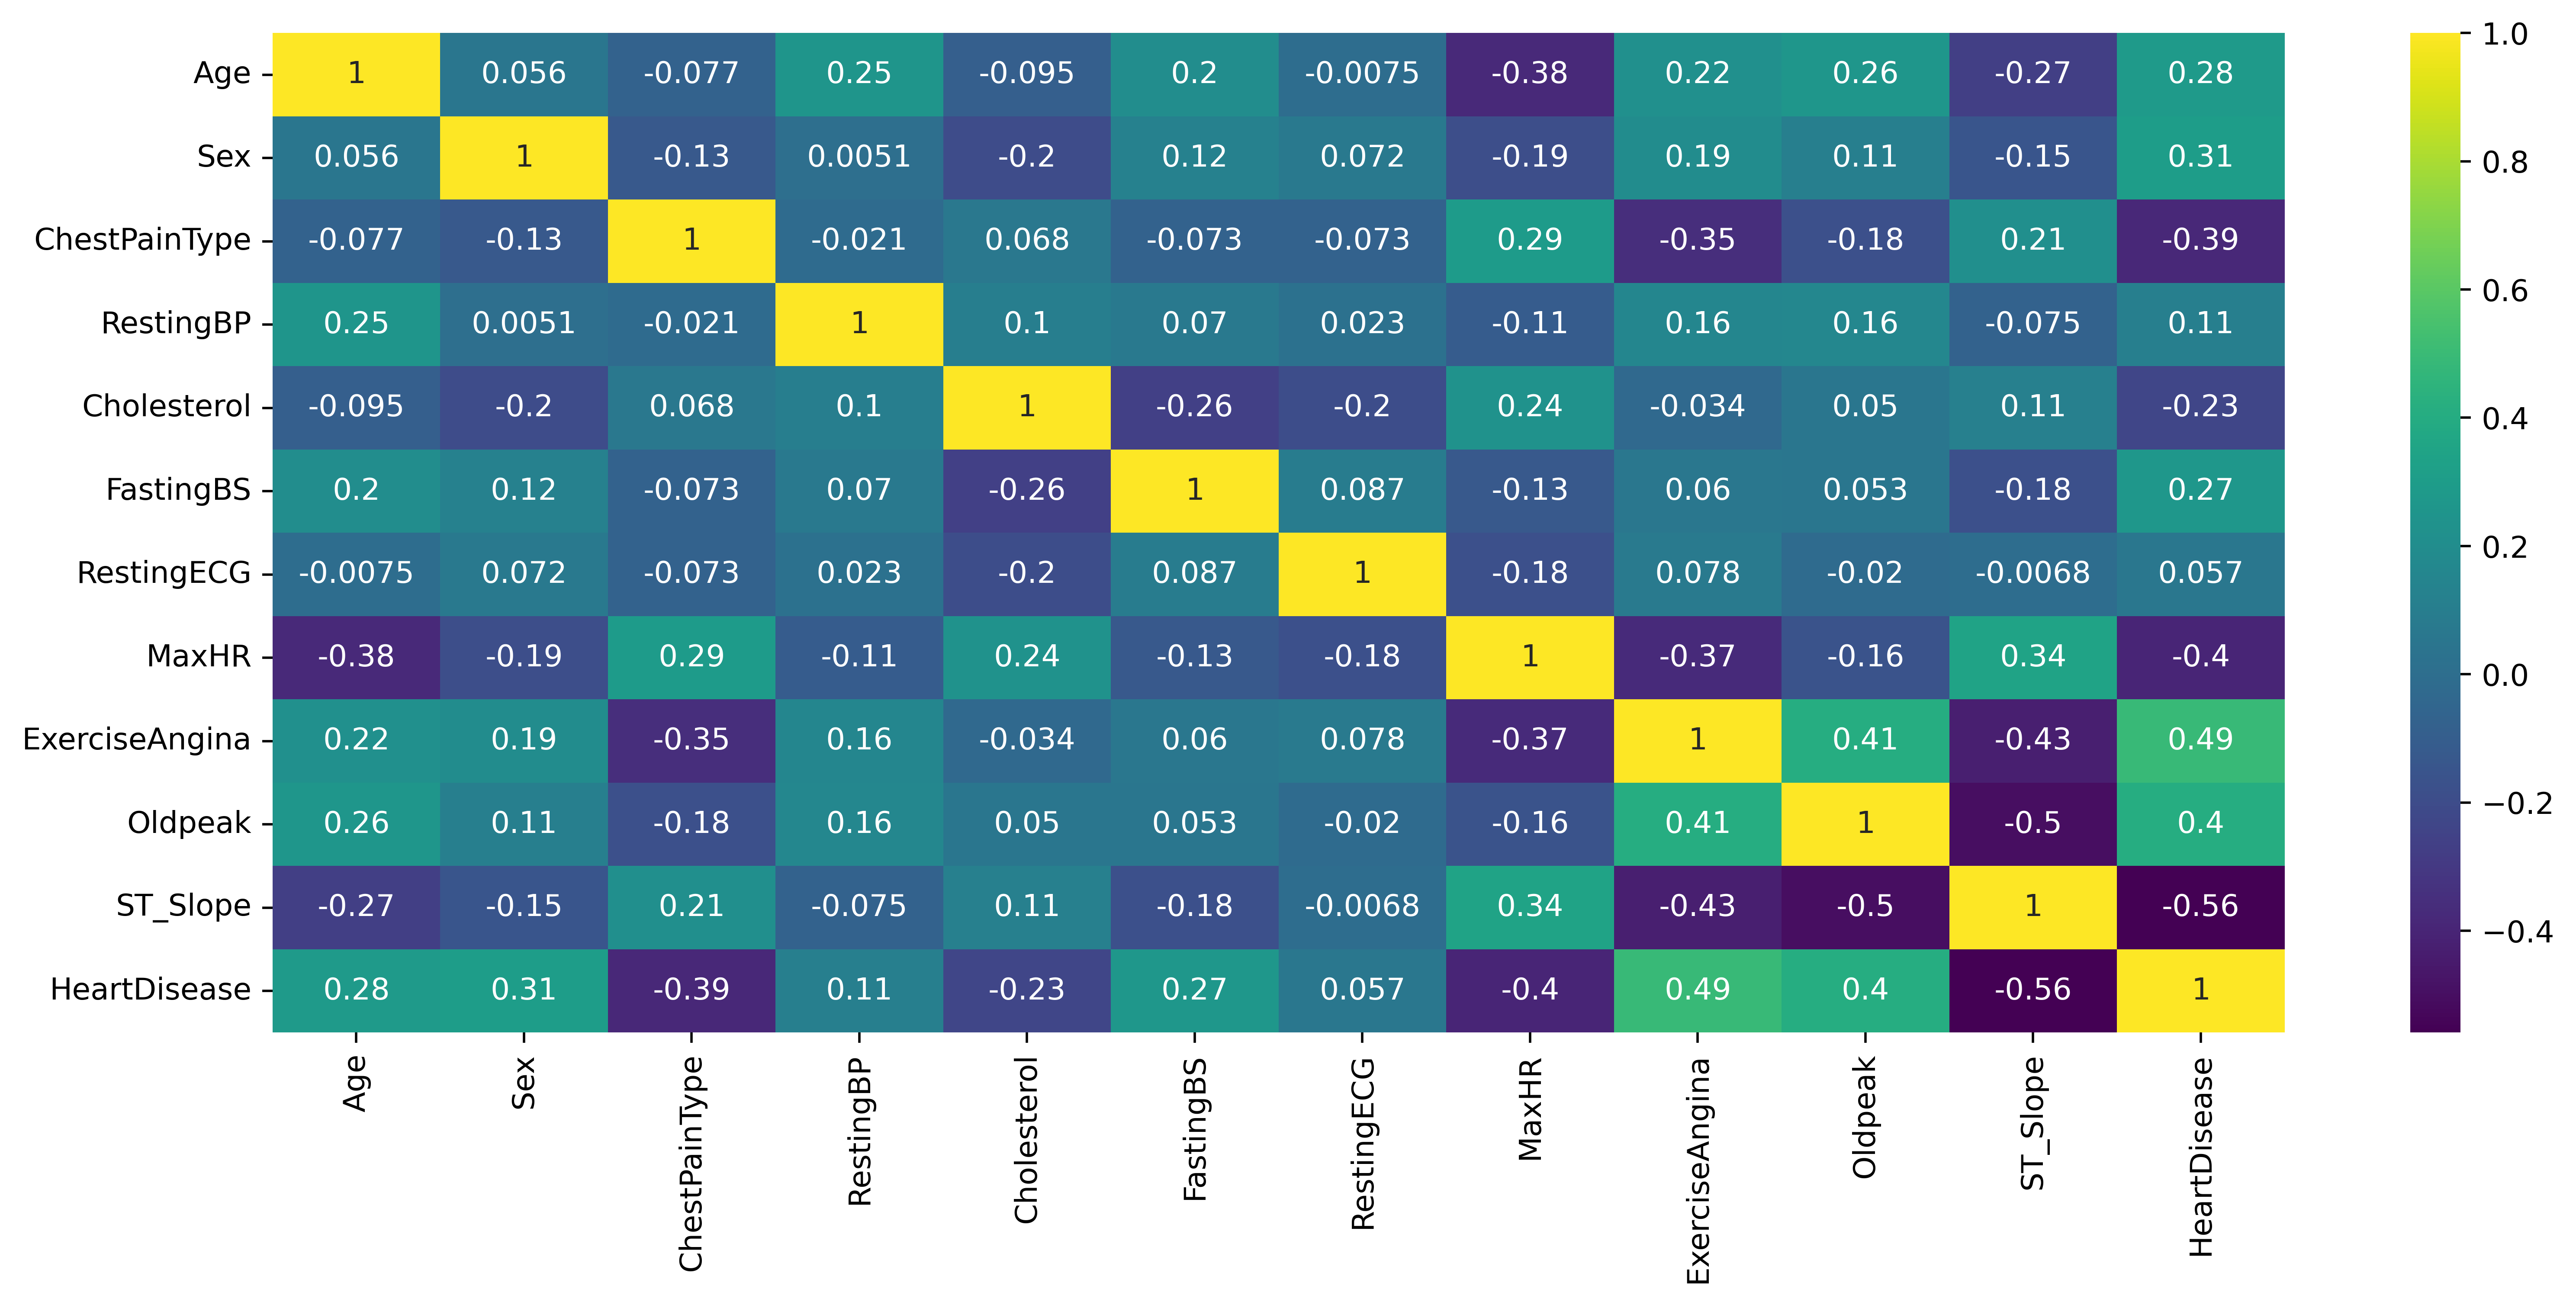

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6),dpi=500)
sns.heatmap(df.corr(),cmap="viridis",annot=True)

<Figure size 7500x3000 with 0 Axes>

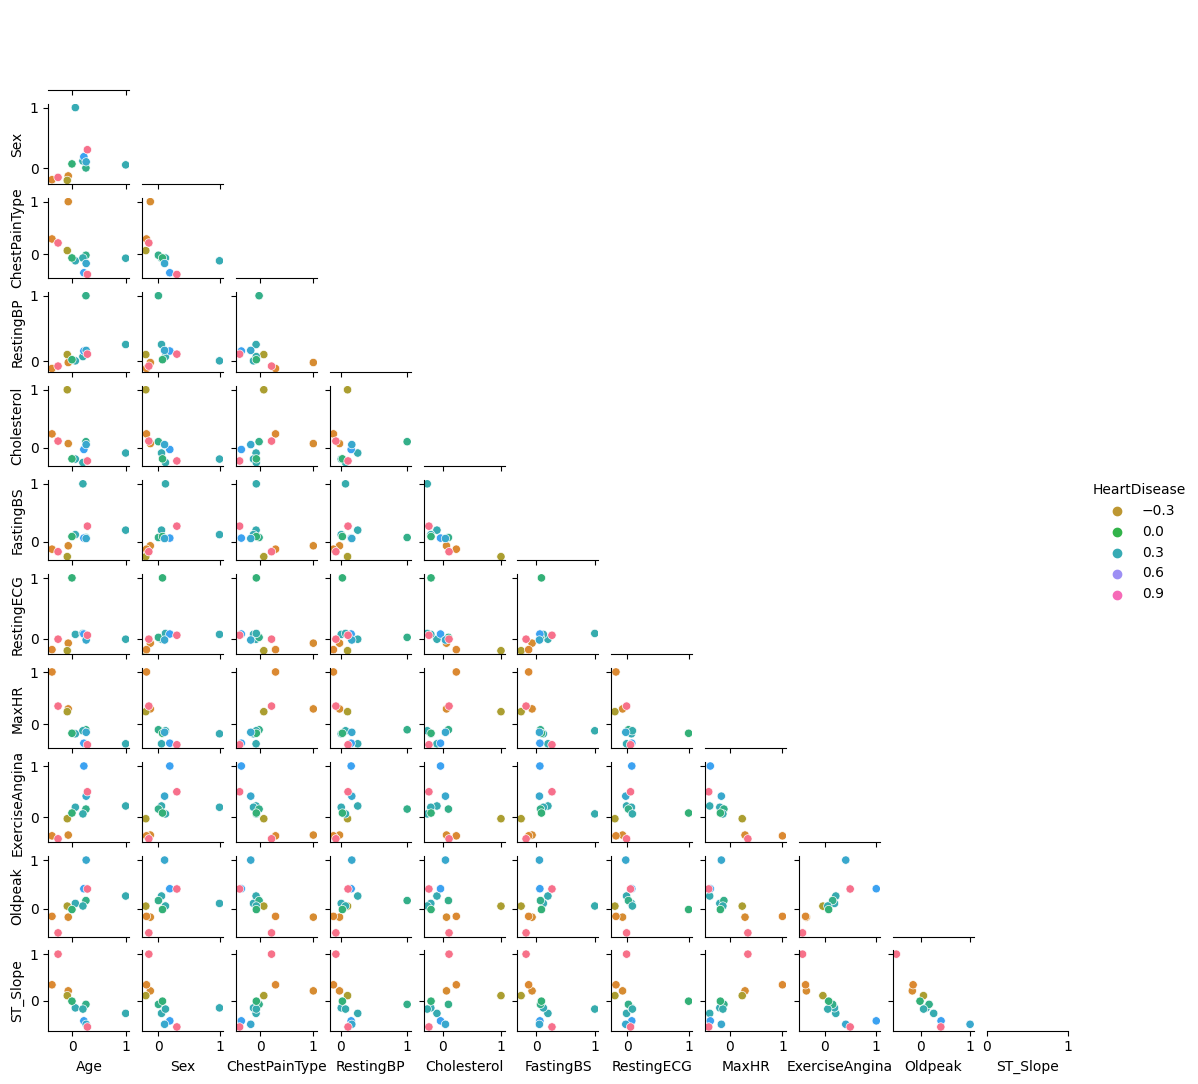

In [16]:
plt.figure(figsize=(15,6),dpi=500)
sns.pairplot(df.corr(),hue="HeartDisease",corner=True,palette="husl",height=1)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [18]:
X=df.drop("HeartDisease",1)
y=df['HeartDisease']

/tmp/ipykernel_5875/427857775.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=df.drop("HeartDisease",1)


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [20]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [21]:
X_train.shape

(642, 11)

In [31]:
def model_dev(algorithm,X_train,X_test,y_train,y_test):
    model=algorithm()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(classification_report(y_test,y_pred))
    
#model training x_train,y_train -->x train has the features while y train has the labels
#ypred will have the predcition from x test which then we will compare with y test which has the labels.

In [23]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

In [32]:
model_dev(LogisticRegression,X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       126
           1       0.84      0.85      0.84       150

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276



/home/cheena/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
scaler=StandardScaler()
mmx=MinMaxScaler()


In [41]:
X_test

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
417,44,1,0,130,209,0,2,127,0,0.0,2
325,42,1,0,105,0,1,1,128,1,-1.5,0
267,34,1,1,98,220,0,1,150,0,0.0,2
241,54,1,0,200,198,0,1,142,1,2.0,1
367,68,1,0,135,0,0,2,120,1,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
196,49,1,0,120,297,0,1,132,0,1.0,1
83,52,1,1,160,196,0,1,165,0,0.0,2
258,51,0,2,150,200,0,1,120,0,0.5,2
290,48,1,2,110,211,0,1,138,0,0.0,2


In [33]:
ss_X_train,ss_X_test=scaler.fit_transform(X_train),scaler.transform(X_test)
# ss_y_train,ss_y_test=scaler.fit_transform(y_train),scaler.fit_transform(y_test)

#X has the columns on which scaling or normalising can happen while y has just one column thats why the error.

In [34]:
#standard scaler
model_dev(LogisticRegression,ss_X_train,ss_X_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       126
           1       0.84      0.87      0.86       150

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



In [38]:
'''we use fit transform on training dataset while transform on testing. As we dont want to fit our testing dataset
it will undergo data leakage'''

In [35]:
mm_X_train,mm_X_test=mmx.fit_transform(X_train),mmx.transform(X_test)


In [36]:
#minmax  scalar
model_dev(LogisticRegression,mm_X_train,mm_X_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       126
           1       0.83      0.85      0.84       150

    accuracy                           0.82       276
   macro avg       0.82      0.82      0.82       276
weighted avg       0.82      0.82      0.82       276



In [37]:
model_dev(RandomForestClassifier,mm_X_train,mm_X_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       126
           1       0.86      0.88      0.87       150

    accuracy                           0.86       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.86      0.86      0.85       276



In [42]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [44]:
data=pd.DataFrame({
    "actual" : y_test,
    "predicted" : y_pred
})

In [45]:
data

,actual,predicted
417,0,0
325,1,1
267,0,0
241,1,1
367,1,1
...,...,...
196,0,1
83,0,0
258,0,0
290,0,0


In [57]:
data.to_csv("heart-prediction.csv")

In [61]:
data.head(50)

,actual,predicted
417,0,0
325,1,1
267,0,0
241,1,1
367,1,1
352,1,1
171,0,0
218,0,0
624,1,1
514,1,1


In [62]:
data["new"]=data['actual'] == data['predicted']

In [71]:
data["new"].value_counts()

True     239
False     37
Name: new, dtype: int64